In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [3]:
train = pd.read_csv('test_and_train_installs/train_data_encoded.csv')
test = pd.read_csv('test_and_train_installs/test_data_encoded.csv')

train2 = pd.read_csv('test_and_train_installs/train_data_encoded2.csv')
test2 = pd.read_csv('test_and_train_installs/test_data_encoded2.csv')

train3 = pd.read_csv('test_and_train_installs/train_data_encoded3.csv')
test3 = pd.read_csv('test_and_train_installs/test_data_encoded3.csv')

train4 = pd.read_csv('test_and_train_installs/train_data_encoded4.csv')
test4 = pd.read_csv('test_and_train_installs/test_data_encoded4.csv')

In [4]:
ref_hashes = train['ref_hash']
del train['ref_hash']
del test['ref_hash']

del train2['ref_hash']
del test2['ref_hash']

del train3['ref_hash']
del test3['ref_hash']

del train4['ref_hash']
del test4['ref_hash']

In [5]:
Xtrain, ytrain = train.iloc[:,:-1],train.iloc[:,-1]
Xtest, ytest = test.iloc[:,:-1],test.iloc[:,-1]

Xtrain2, ytrain2 = train2.iloc[:,:-1],train2.iloc[:,-1]
Xtest2, ytest2 = test2.iloc[:,:-1],test2.iloc[:,-1]

Xtrain3, ytrain3 = train3.iloc[:,:-1],train3.iloc[:,-1]
Xtest3, ytest3 = test3.iloc[:,:-1],test3.iloc[:,-1]

Xtrain4, ytrain4 = train4.iloc[:,:-1],train4.iloc[:,-1]
Xtest4, ytest4 = test4.iloc[:,:-1],test4.iloc[:,-1]

In [6]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [7]:
# Entrenamiento
xg_reg.fit(Xtrain,ytrain)

/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [8]:
# Prediccion
preds = xg_reg.predict(Xtest)

In [9]:
# Error RMSE
rmse = np.sqrt(mean_squared_error(ytest, preds))
print("RMSE: %f" % (rmse))

RMSE: 89597.365944


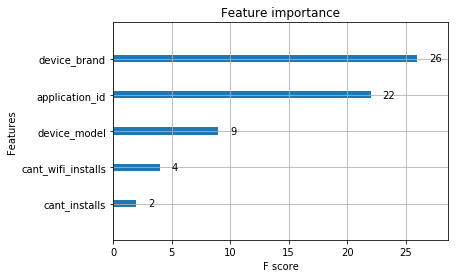

In [10]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [15]:
df_predicciones = pd.DataFrame(ref_hashes)
df_predicciones['predictions_v1'] = preds
df_predicciones['ytest_v1'] = ytest
df_predicciones

,ref_hash,predictions_v1,ytest_v1
0,1000169251625791246_sc,79443.140625,29646.1780
1,1000395625957344683_sc,168773.484375,259200.0000
2,1003027494996471685_sc,82723.609375,247044.3875
3,1006670001679961544_sc,81356.578125,4844.0530
4,1007573308966476713_sc,168773.484375,259200.0000
5,1010070503877148763_sc,168773.484375,259200.0000
6,1010265377387765028_sc,168773.484375,259200.0000
7,1010531372912327058_sc,168773.484375,259200.0000
8,1011610998357271358_sc,82371.164062,5657.6230
9,1013543838965040946_sc,168773.484375,259200.0000


In [12]:
# Entrenamiento 2
xg_reg.fit(Xtrain2,ytrain2)

/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [13]:
# Prediccion 3
preds2 = xg_reg.predict(Xtest2)

In [14]:
# Error RMSE
rmse = np.sqrt(mean_squared_error(ytest2, preds2))
print("RMSE: %f" % (rmse))

RMSE: 89635.477254


In [16]:
df_predicciones['predictions_v2'] = preds2
df_predicciones['ytest_v2'] = ytest2
df_predicciones

,ref_hash,predictions_v1,ytest_v1,predictions_v2,ytest_v2
0,1000169251625791246_sc,79443.140625,29646.1780,168762.906250,259200.0000
1,1000395625957344683_sc,168773.484375,259200.0000,168762.906250,259200.0000
2,1003027494996471685_sc,82723.609375,247044.3875,84675.992188,160644.3875
3,1006670001679961544_sc,81356.578125,4844.0530,168762.906250,259200.0000
4,1007573308966476713_sc,168773.484375,259200.0000,168762.906250,259200.0000
5,1010070503877148763_sc,168773.484375,259200.0000,168762.906250,259200.0000
6,1010265377387765028_sc,168773.484375,259200.0000,168762.906250,259200.0000
7,1010531372912327058_sc,168773.484375,259200.0000,168762.906250,259200.0000
8,1011610998357271358_sc,82371.164062,5657.6230,168762.906250,259200.0000
9,1013543838965040946_sc,168773.484375,259200.0000,168762.906250,259200.0000


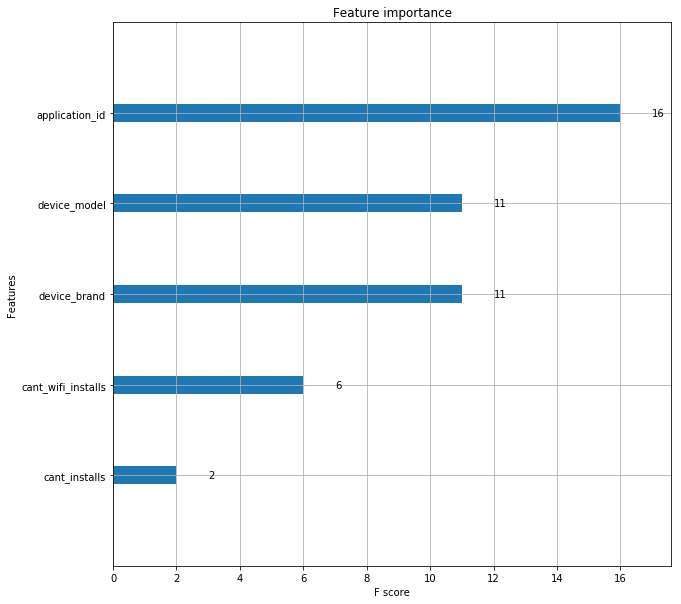

In [17]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [18]:
# Entrenamiento 3
xg_reg.fit(Xtrain3,ytrain3)

/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [19]:
# Prediccion 3
preds3 = xg_reg.predict(Xtest3)

In [20]:
# Error RMSE
rmse = np.sqrt(mean_squared_error(ytest3, preds3))
print("RMSE: %f" % (rmse))

RMSE: 90505.128574


In [21]:
df_predicciones['predictions_v3'] = preds3
df_predicciones['ytest_v3'] = ytest3
df_predicciones

,ref_hash,predictions_v1,ytest_v1,predictions_v2,ytest_v2,predictions_v3,ytest_v3
0,1000169251625791246_sc,79443.140625,29646.1780,168762.906250,259200.0000,168788.375000,259200.0000
1,1000395625957344683_sc,168773.484375,259200.0000,168762.906250,259200.0000,168788.375000,259200.0000
2,1003027494996471685_sc,82723.609375,247044.3875,84675.992188,160644.3875,82491.742188,74244.3875
3,1006670001679961544_sc,81356.578125,4844.0530,168762.906250,259200.0000,168788.375000,259200.0000
4,1007573308966476713_sc,168773.484375,259200.0000,168762.906250,259200.0000,168788.375000,259200.0000
5,1010070503877148763_sc,168773.484375,259200.0000,168762.906250,259200.0000,89004.734375,239960.7560
6,1010265377387765028_sc,168773.484375,259200.0000,168762.906250,259200.0000,168788.375000,259200.0000
7,1010531372912327058_sc,168773.484375,259200.0000,168762.906250,259200.0000,168788.375000,259200.0000
8,1011610998357271358_sc,82371.164062,5657.6230,168762.906250,259200.0000,168788.375000,259200.0000
9,1013543838965040946_sc,168773.484375,259200.0000,168762.906250,259200.0000,81134.789062,251325.2050


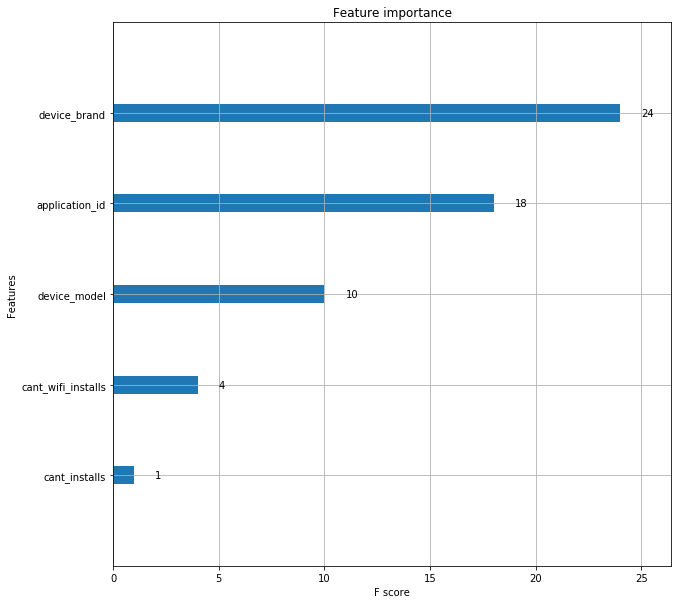

In [22]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [23]:
# Entrenamiento 4
xg_reg.fit(Xtrain4,ytrain4)

/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [24]:
# Prediccion 4
preds4 = xg_reg.predict(Xtest4)

In [25]:
# Error RMSE
rmse = np.sqrt(mean_squared_error(ytest4, preds4))
print("RMSE: %f" % (rmse))

RMSE: 91804.238082


In [26]:
df_predicciones['predictions_v4'] = preds4
df_predicciones['ytest_v4'] = ytest4
df_predicciones

,ref_hash,predictions_v1,ytest_v1,predictions_v2,ytest_v2,predictions_v3,ytest_v3,predictions_v4,ytest_v4
0,1000169251625791246_sc,79443.140625,29646.1780,168762.906250,259200.0000,168788.375000,259200.0000,168787.593750,259200.000
1,1000395625957344683_sc,168773.484375,259200.0000,168762.906250,259200.0000,168788.375000,259200.0000,168787.593750,259200.000
2,1003027494996471685_sc,82723.609375,247044.3875,84675.992188,160644.3875,82491.742188,74244.3875,168787.593750,259200.000
3,1006670001679961544_sc,81356.578125,4844.0530,168762.906250,259200.0000,168788.375000,259200.0000,168787.593750,259200.000
4,1007573308966476713_sc,168773.484375,259200.0000,168762.906250,259200.0000,168788.375000,259200.0000,168787.593750,259200.000
5,1010070503877148763_sc,168773.484375,259200.0000,168762.906250,259200.0000,89004.734375,239960.7560,84629.617188,153560.756
6,1010265377387765028_sc,168773.484375,259200.0000,168762.906250,259200.0000,168788.375000,259200.0000,168787.593750,259200.000
7,1010531372912327058_sc,168773.484375,259200.0000,168762.906250,259200.0000,168788.375000,259200.0000,168787.593750,259200.000
8,1011610998357271358_sc,82371.164062,5657.6230,168762.906250,259200.0000,168788.375000,259200.0000,168787.593750,259200.000
9,1013543838965040946_sc,168773.484375,259200.0000,168762.906250,259200.0000,81134.789062,251325.2050,83285.992188,164925.205


In [29]:
df2 = pd.DataFrame(ref_hashes)
df2['predictions'] = (df_predicciones['predictions_v1'] + df_predicciones['predictions_v2'] + df_predicciones['predictions_v3'] + df_predicciones['predictions_v4']) / 4
df2.to_csv('submit_kaggle/pred_installs.csv', index=False)

In [30]:
df2

,ref_hash,predictions
0,1000169251625791246_sc,146445.500000
1,1000395625957344683_sc,168778.093750
2,1003027494996471685_sc,104669.734375
3,1006670001679961544_sc,146923.875000
4,1007573308966476713_sc,168778.093750
5,1010070503877148763_sc,127792.687500
6,1010265377387765028_sc,168778.093750
7,1010531372912327058_sc,168778.093750
8,1011610998357271358_sc,147177.500000
9,1013543838965040946_sc,125489.289062
